## PROCESSAMENTO DE IMAGENS 

**Objetivos da aula:**

*   reconhecer e fazer medidas básicas e aproximadas de objetos

**O PROBLEMA**

Como obter os tamanhos dos objetos?


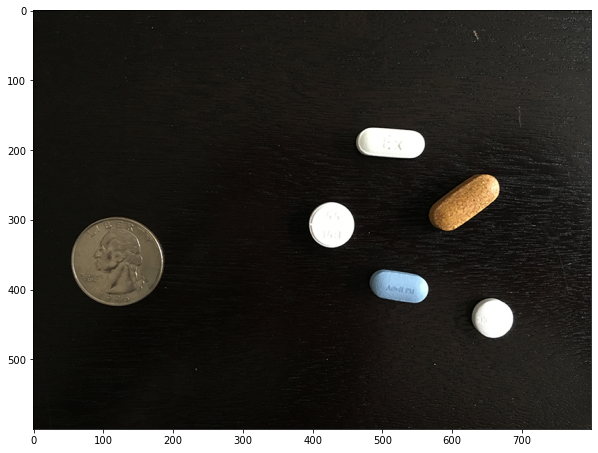

In [2]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np

img = cv2.imread('objects.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize = (10,10))
plt.imshow(img); plt.show();

**EXERCÍCIO**

Calcular as arestas dos objetos da imagem acima.


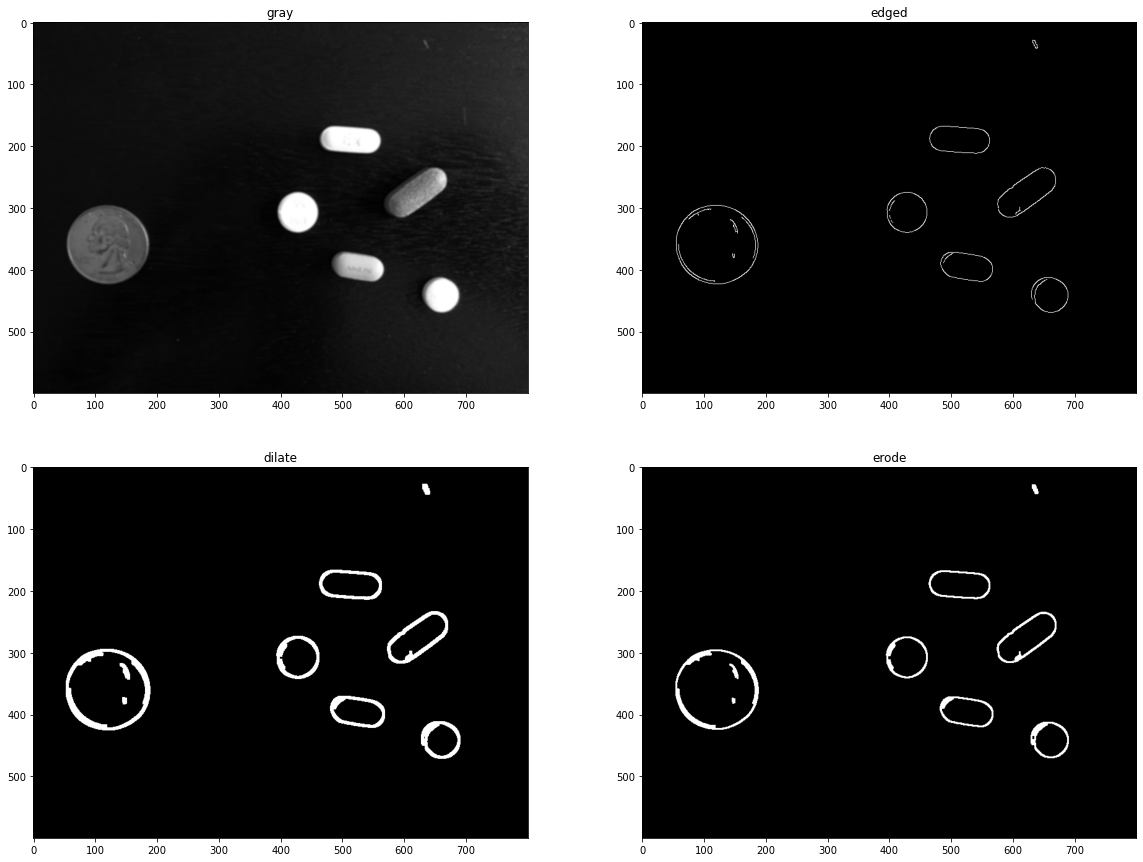

In [3]:
#uma solução possivel...

#carregamos a imagem, convertemos para níveis de cinza e a borramos levemente
image = cv2.imread('objects.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (7,7), 0)

#calculamos as arestas e realizamos uma dilatação + erosão para fechar
#eventuais gaps entre as arestas dos objetos
edged = cv2.Canny(gray, 50, 150)
dilate = cv2.dilate(edged, None, iterations=2)
erode = cv2.erode(dilate, None, iterations=1)

plt.figure(figsize = (20,15))
plt.subplot(2, 2, 1), plt.imshow(gray, 'gray'), plt.title('gray')
plt.subplot(2, 2, 2), plt.imshow(edged, 'gray'), plt.title('edged')
plt.subplot(2, 2, 3), plt.imshow(dilate, 'gray'), plt.title('dilate')
plt.subplot(2, 2, 4), plt.imshow(erode, 'gray'), plt.title('erode')
plt.show();


### desafio1

Dica rápida de python. Vamos utilizar a função `zip` do python que retorna uma sequência de tuplas. Pratique um pouco essa função. 

- http://devfuria.com.br/python/built-in-zip/
- https://pythonhelp.wordpress.com/2013/04/16/funcao-zip-em-python/
- https://www.programiz.com/python-programming/methods/built-in/zip

obs. O operador `*` pode ser utilizado com o zip() para descompactar (unzip) uma lista. 


In [3]:
## pratique um pouco, rode os exemplos dos links para te ajudar a compreender o que está acontecendo...




### desafio2

Dica rápida de python. Vamos utilizar `list comprehensions` que basicamente realiza de forma compacta uma manipulação de listas. Pratique um pouco essa função.

- https://pythonhelp.wordpress.com/2011/03/01/list-comprehension/
- https://www.w3schools.com/python/python_lists_comprehension.asp
- https://pythonacademy.com.br/blog/list-comprehensions-no-python

In [4]:
## pratique um pouco, rode os exemplos dos links para te ajudar a compreender o que está acontecendo...



### desafio3

Dica rápida de python. Vamos utilizar a função `lambda` que basicamente realiza de forma pratica uma função anônima. Pratique um pouco essa função.

- https://www.hashtagtreinamentos.com/funcoes-lambda-python?gclid=CjwKCAjwiuuRBhBvEiwAFXKaNF77HmSrHlWg1Tx5Okpt6x9QFZemjbINiX9sX43R-fCNnXkuy8fiTxoCkiEQAvD_BwE
- https://www.w3schools.com/python/python_lambda.asp
- https://www.codingame.com/playgrounds/52499/programacao-python-intermediario---prof--marco-vaz/funcao-lambda

In [5]:
## pratique um pouco, rode os exemplos dos links para te ajudar a compreender o que está acontecendo...



### **OBTENÇÃO DOS CONTORNOS**

A partir das arestas, podemos obter os contornos dos objetos.

In [4]:
cnts, _ = cv2.findContours(erode.copy(),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)

# Ordena a lista de contornos para ficar da esquerda para direita. 
# Vamos precisar disso mais tarde.  
# https://github.com/jrosebr1/imutils/blob/master/imutils/contours.py

(cnts, boundingBoxes) = zip(*sorted(zip(cnts, [cv2.boundingRect(c) for c in cnts]), key=lambda b: b[1][0], reverse=False))

In [5]:
# https://github.com/jrosebr1/imutils/blob/master/imutils/perspective.py
# ordena os pontos do contorno de tal modo que eles
# apareçam na seguinte ordem: topo-esquerda, topo-direita,
# base-direita e base-esquerda
import numpy as np
from scipy.spatial import distance as dist


def order_points(pts):
     xSorted = pts[np.argsort(pts[:, 0]), :]

    # grab the left-most and right-most points from the sorted
    # x-roodinate points
     leftMost = xSorted[:2, :]
     rightMost = xSorted[2:, :]

    # now, sort the left-most coordinates according to their
    # y-coordinates so we can grab the top-left and bottom-left
    # points, respectively
     leftMost = leftMost[np.argsort(leftMost[:, 1]), :]
     (tl, bl) = leftMost

    # now that we have the top-left coordinate, use it as an
    # anchor to calculate the Euclidean distance between the
    # top-left and right-most points; by the Pythagorean
    # theorem, the point with the largest distance will be
    # our bottom-right point
     D = dist.cdist(tl[np.newaxis], rightMost, "euclidean")[0]
     (br, tr) = rightMost[np.argsort(D)[::-1], :]

    # return the coordinates in top-left, top-right,
    # bottom-right, and bottom-left order
     return np.array([tl, tr, br, bl], dtype="float32")   

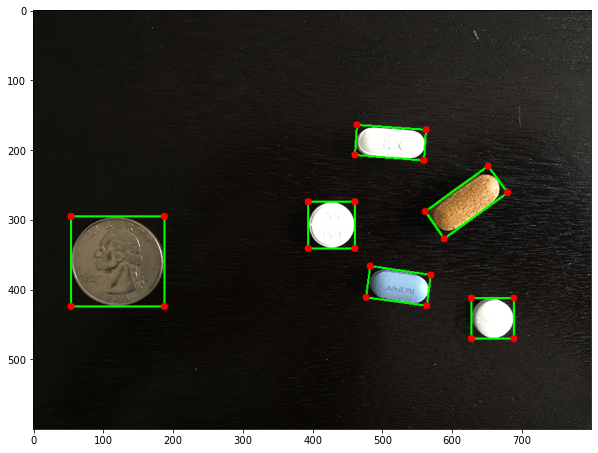

In [6]:

orig = image.copy()

#Percorre todos os contornos
for c in cnts:
  # se o contorno não é suficientemente grande, ignorá-lo
  if cv2.contourArea(c) < 100:
    continue
  
  # calcula a bounding box rotacionada do contorno
  box = cv2.minAreaRect(c)
  box = cv2.boxPoints(box) 
  box = np.array(box, dtype="int")

  #ordena os pontos do contorno de tal modo que eles
  #apareçam na seguinte ordem: topo-esquerda, topo-direita,
  #base-direita e base-esquerda
  
  box = order_points(box)
  #print(box)
  cv2.drawContours(orig, [box.astype("int")], -1, (0, 255, 0), 2)
  for (x, y) in box:
    cv2.circle(orig, (int(x), int(y)), 5, (255, 0, 0), -1)

plt.figure(figsize = (10,10))
plt.imshow(orig); plt.show();


**OBTENÇÃO DOS PONTOS MÉDIOS**

Vamos, agora, obter os pontos-médios de cada região identificada e desenhá-los:

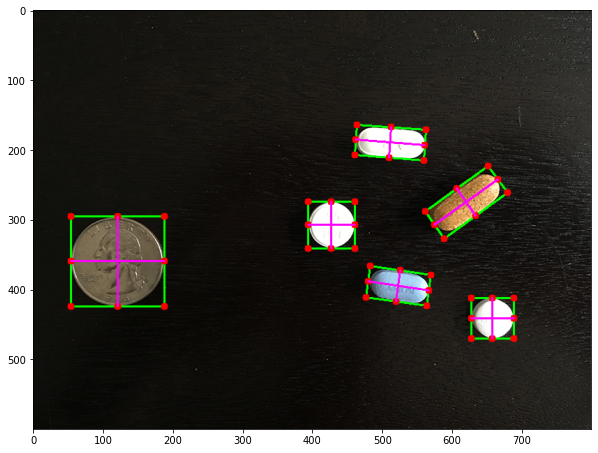

In [18]:
import numpy as np

def midpoint(ptA, ptB):
  return ((ptA[0] + ptB[0]) * 0.5, (ptA[1] + ptB[1]) * 0.5)

orig = image.copy()
#Percorre todos os contornos
for c in cnts:
  # ignora contornos muito pequenos
  if cv2.contourArea(c) < 100:
    continue
  # calcula a bounding box rotacionada do contorno
  box = cv2.minAreaRect(c)
  box = cv2.boxPoints(box) 
  box = np.array(box, dtype="int")
  
  #ordena os pontos do contorno de tal modo que eles
  #apareçam na seguinte ordem: top-left, top-right,
  #bottom-right e bottom-left
  box = order_points(box)
  cv2.drawContours(orig, [box.astype("int")], -1, (0, 255, 0), 2)
  for (x, y) in box:
    cv2.circle(orig, (int(x), int(y)), 5, (255, 0, 0), -1)

  #obtém os pontos médios de top-left/top-right e bottom-left e bottom-right
  (tl, tr, br, bl) = box
  (tltrX, tltrY) = midpoint(tl, tr)
  (blbrX, blbrY) = midpoint(bl, br)
  
  #obtém os pontos médios de top-left/bottom-left e top-right e bottom-right
  (tlblX, tlblY) = midpoint(tl, bl)
  (trbrX, trbrY) = midpoint(tr, br)

  #desenha cículos nos pontos-médios
  cv2.circle(orig, (int(tltrX), int(tltrY)), 5, (255, 0, 0), -1)
  cv2.circle(orig, (int(blbrX), int(blbrY)), 5, (255, 0, 0), -1)
  cv2.circle(orig, (int(tlblX), int(tlblY)), 5, (255, 0, 0), -1)
  cv2.circle(orig, (int(trbrX), int(trbrY)), 5, (255, 0, 0), -1)
  
  #une os pontos-médios com segmentos de reta
  cv2.line(orig, (int(tltrX), int(tltrY)), (int(blbrX), int(blbrY)),(255, 0, 255), 2)
  cv2.line(orig, (int(tlblX), int(tlblY)), (int(trbrX), int(trbrY)),(255, 0, 255), 2)

plt.figure(figsize = (10,10))
plt.imshow(orig); plt.show();

**OBTENÇÃO DAS MEDIDAS**

Para obter as medidas dos objetos, precisamos tomar um objeto de referência (ponto de calibração) de tamanho conhecido. Na imagem anterior, vamos tomar como medida de referência a moeda de dólar norte-americano, cujo comprimento é 2.43 cm. A partir dela, definimos todas as outras medidas.

É neste ponto que vai servir ter feito a ordenação do `cnts` da esquerda para a direita, a nossa moeda de dólar esta bem destacada no lado esquerdo da imagem, desta forma fica facil fazer a calibração pois será o primeiro item da lista.

In [10]:
width=2.43
pixelsPerMetric=None

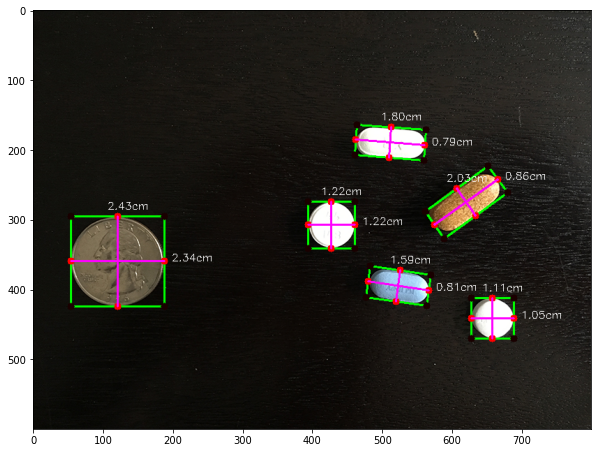

In [11]:
def midpoint(ptA, ptB):
  return ((ptA[0] + ptB[0]) * 0.5, (ptA[1] + ptB[1]) * 0.5)

orig = image.copy()
#Percorre todos os contornos
for c in cnts:
  # se o contorno não é suficientemente grande, ignorá-lo
  if cv2.contourArea(c) < 100:
    continue
  # calcula a bounding box rotacionada do contorno
  box = cv2.minAreaRect(c)
  box = cv2.boxPoints(box) 
  box = np.array(box, dtype="int")
  #ordena os pontos do contorno de tal modo que eles
  #apareçam na seguinte ordem: top-left, top-right,
  #bottom-right e bottom-left
  box = order_points(box)
  cv2.drawContours(orig, [box.astype("int")], -1, (0, 255, 0), 2)
  for (x, y) in box:
    cv2.circle(orig, (int(x), int(y)), 5, (25, 0, 0), -1)

  #obtém os pontos médios de top-left/top-right e bottom-left e bottom-right
  (tl, tr, br, bl) = box
  (tltrX, tltrY) = midpoint(tl, tr)
  (blbrX, blbrY) = midpoint(bl, br)
  
  #obtém os pontos médios de top-left/bottom-left e top-right e bottom-right
  (tlblX, tlblY) = midpoint(tl, bl)
  (trbrX, trbrY) = midpoint(tr, br)

  #desenha cículos nos pontos-médios
  cv2.circle(orig, (int(tltrX), int(tltrY)), 5, (255, 0, 0), -1)
  cv2.circle(orig, (int(blbrX), int(blbrY)), 5, (255, 0, 0), -1)
  cv2.circle(orig, (int(tlblX), int(tlblY)), 5, (255, 0, 0), -1)
  cv2.circle(orig, (int(trbrX), int(trbrY)), 5, (255, 0, 0), -1)
  
  #une os pontos-médios com segmentos de reta
  cv2.line(orig, (int(tltrX), int(tltrY)), (int(blbrX), int(blbrY)),(255, 0, 255), 2)
  cv2.line(orig, (int(tlblX), int(tlblY)), (int(trbrX), int(trbrY)),(255, 0, 255), 2)
  
  # Cálculo da distância entre dois pontos, distância euclidiana
  dA = dist.euclidean((tltrX, tltrY), (blbrX, blbrY))
  dB = dist.euclidean((tlblX, tlblY), (trbrX, trbrY))
  
  # define a escala para relacionar pixel por centrimetro
  if pixelsPerMetric is None:
    pixelsPerMetric = dB / width
  
  dimA = dA / pixelsPerMetric
  dimB = dB / pixelsPerMetric
  
  cv2.putText(orig, "{:.2f}cm".format(dimB),(int(tltrX - 15), int(tltrY - 10)), cv2.FONT_HERSHEY_SIMPLEX,0.50, (255, 255, 255), 1)
  cv2.putText(orig, "{:.2f}cm".format(dimA),(int(trbrX + 10), int(trbrY)), cv2.FONT_HERSHEY_SIMPLEX,0.50, (255, 255, 255), 1) 
  
plt.figure(figsize = (10,10))
plt.imshow(orig); plt.show();

Referência: 
- https://pyimagesearch.com/2016/03/28/measuring-size-of-objects-in-an-image-with-opencv/

### Desafio

Realize o processamento da imagem abaixo a fim de obter os dimensionais de todos os cartões. Faça a escolha de um dos cartões para ser a referência e servir de calibração.

O cartão da esquerda possui 8.89 x 5.08 cm.

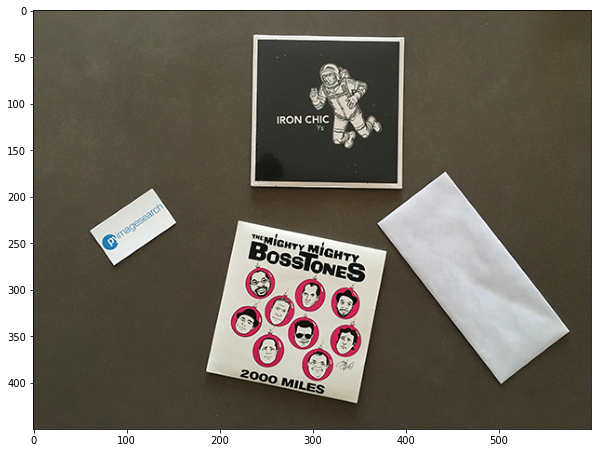

In [12]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np

img = cv2.imread('objects2.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize = (10,10))
plt.imshow(img); plt.show();

In [13]:
### Seu código aqui....






### Desafio extra top!

Um grande problemada industria de manufatura está na determinção do dimensional de alguns objetos para controle de qualidade. Nesse sentido, você foi contratado para desenvolver um sistema que irá capturar um frame de um vídeo, processar e definir o seu dimenssional.

Se topar o desafio, vamos fazer um projeto IC?

In [ ]:
pip install opencv-pytho